In [1]:
using Distributions
using GaussianMixtures
using PyPlot

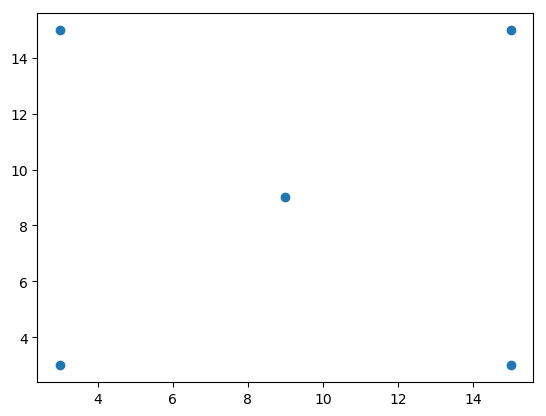

PyObject <matplotlib.collections.PathCollection object at 0x7f85bdc16860>

In [2]:
# create 5 evenly distributed cluster centers
m = convert(Array{Float64,2}, [3 3; 3 15; 15 15; 15 3; 9 9])
scatter(m[:,1], m[:,2])

In [3]:
# create covariation matrix
s = [1 0; 0 1]

2×2 Array{Int64,2}:
 1  0
 0  1

In [4]:
# number of classes in source data
classes = size(m)[1]

5

In [5]:
# for each class generate 2d mixed gaussians with 1000 points each and concatenate them in a single vector
for i=1:classes
    mvn = MvNormal(m[i,:], s)
    arr = rand(mvn,1000)
    
    # arr is an 2 element column vector where each element is an row vector of (1000,) size
    if i==1
        global xfull = arr[1,:]'
        global yfull = arr[2,:]'
    else
        xfull = hcat(xfull, arr[1,:]')
        yfull = hcat(yfull, arr[2,:]')        
    end
        
end

In [6]:
size(xfull)

(1, 5000)

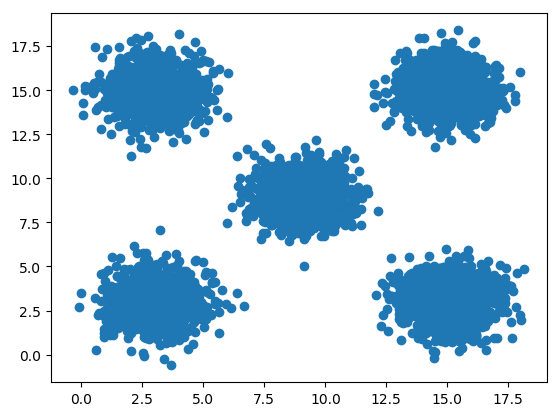

PyObject <matplotlib.collections.PathCollection object at 0x7f85bdae79e8>

In [7]:
# display generated clusters data. each cluster contains 1000 points of 2d mixed gaussians
scatter(xfull, yfull)

In [8]:
# create source data array as concatenation of 5 separate in space 2d mixed gaussians
X = hcat(xfull', yfull')

5000×2 Array{Float64,2}:
  3.27601   2.14642 
  1.91036   0.951263
  1.8162    3.82978 
  2.00185   4.17437 
  2.04951   2.8583  
  2.23904   2.36271 
  3.46603   5.62562 
  1.85109   2.02848 
  1.64163   2.45347 
  3.76419   4.10364 
  4.26828   3.13209 
  2.48437   3.93672 
  4.37015   0.290196
  ⋮                 
 10.043     8.60048 
  8.5976    7.30209 
  8.29668   7.95822 
  9.25688   7.46403 
  7.82684   8.16797 
  8.70813   8.63192 
  8.83482  10.1866  
  9.30999   8.42473 
  8.02278   9.6943  
  8.01511   8.60012 
  9.69225   8.28332 
  8.14447   8.76214 

In [9]:
# creating a model with 100 iterations for K-means initialization and without any fitting
gmm = GMM(classes, X, kind=:full, nInit=100, nIter=0)

┌ Info: Initializing GMM, 5 Gaussians LinearAlgebra.diag covariance 2 dimensions using 5000 data points
└ @ GaussianMixtures /home/toleg/.julia/packages/GaussianMixtures/RGtTJ/src/train.jl:77
┌ Warning: implicit `dims=2` argument now has to be passed explicitly to specify that distances between columns should be computed
│   caller = ip:0x0
└ @ Core :-1


  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.685018e+04
      1       1.014803e+04      -6.702151e+03 |        0
      2       1.014803e+04       0.000000e+00 |        0
K-means converged with 2 iterations (objv = 10148.03223875798)


┌ Warning: implicit `dims=2` argument now has to be passed explicitly to specify that distances between columns should be computed
│   caller = macro expansion at printf.jl:161 [inlined]
└ @ Core ./printf.jl:161
┌ Info: K-means with 5000 data points using 2 iterations
│ 333.3 data points per parameter
└ @ GaussianMixtures /home/toleg/.julia/packages/GaussianMixtures/RGtTJ/src/train.jl:138
┌ Info: Running 0 iterations EM on full cov GMM with 5 Gaussians in 2 dimensions
└ @ GaussianMixtures /home/toleg/.julia/packages/GaussianMixtures/RGtTJ/src/train.jl:242
┌ Info: EM with 5000 data points 0 iterations avll -2.230787
│ 172.4 data points per parameter
└ @ GaussianMixtures /home/toleg/.julia/packages/GaussianMixtures/RGtTJ/src/gmms.jl:71


GMM{Float64} with 5 components in 2 dimensions and full covariance
Mix 1: weight 0.200000
 mean: [3.01575, 14.9853]
 covariance: 2×2 Array{Float64,2}:
 1.03354     0.00508105
 0.00508105  1.04518   
Mix 2: weight 0.200000
 mean: [15.0284, 2.98908]
 covariance: 2×2 Array{Float64,2}:
 1.02785     0.00513349
 0.00513349  1.00147   
⋮
Mix 4: weight 0.200000
 mean: [3.03057, 3.03475]
 covariance: 2×2 Array{Float64,2}:
 1.03731    0.0217666
 0.0217666  0.996773 
Mix 5: weight 0.200000
 mean: [9.06509, 8.97708]
 covariance: 2×2 Array{Float64,2}:
 1.03356     0.00732658
 0.00732658  1.00757   


4 (1:2, 4:5)


In [10]:
# defining EM phase exit condition as log likelihood change delta is less than 1e-5
const delta = 1e-5

# init iterations counter, total number of iterations, current and previous log likelihoods
i = 0
iter_max = 100
prev_prob, curr_prob = 0, 0

# running iterations until likelihood change will become less than delta or max iterations exceeded
while i == 0 || (abs(curr_prob - prev_prob) >= delta && i <= iter_max)
    prev_prob = curr_prob
    curr_prob = GaussianMixtures.em!(gmm, X, nIter=1)[1]
    i += 1
    println("Iteration ", i, ", previous: ", prev_prob, ", current: ", curr_prob, ", delta: ", abs(curr_prob - prev_prob))
end

if abs(curr_prob - prev_prob) < delta
    println("Log likelihood change delta is less than defined threshold: $delta. EM phase stopped")
elseif i > iter_max
    println("Max iterations number exceeded. EM phase stopped")
end
    

┌ Info: Running 1 iterations EM on full cov GMM with 5 Gaussians in 2 dimensions
└ @ GaussianMixtures /home/toleg/.julia/packages/GaussianMixtures/RGtTJ/src/train.jl:242
┌ Info: iteration 1, average log likelihood -2.230787
└ @ GaussianMixtures /home/toleg/.julia/packages/GaussianMixtures/RGtTJ/src/gmms.jl:71


Iteration 1, previous: 0, current: -2.230786984620881, delta: 2.230786984620881
Iteration 2, previous: -2.230786984620881, current: -2.2307867386478732, delta: 2.459730077397637e-7
Log likelihood change delta is less than defined threshold: 1.0e-5. EM phase stopped

┌ Info: EM with 5000 data points 1 iterations avll -2.230787
│ 172.4 data points per parameter
└ @ GaussianMixtures /home/toleg/.julia/packages/GaussianMixtures/RGtTJ/src/gmms.jl:71
┌ Info: Running 1 iterations EM on full cov GMM with 5 Gaussians in 2 dimensions
└ @ GaussianMixtures /home/toleg/.julia/packages/GaussianMixtures/RGtTJ/src/train.jl:242
┌ Info: iteration 1, average log likelihood -2.230787
└ @ GaussianMixtures /home/toleg/.julia/packages/GaussianMixtures/RGtTJ/src/gmms.jl:71
┌ Info: EM with 5000 data points 1 iterations avll -2.230787
│ 172.4 data points per parameter
└ @ GaussianMixtures /home/toleg/.julia/packages/GaussianMixtures/RGtTJ/src/gmms.jl:71


In [11]:
GaussianMixtures.means(gmm)

5×2 Array{Float64,2}:
  3.01576  14.9853 
 15.0284    2.98907
 14.9409   15.0242 
  3.03058   3.03476
  9.06511   8.97707

In [12]:
GaussianMixtures.covars(gmm)

5-element Array{Array{Float64,2},1}:
 [1.03256 0.00501902; 0.00501902 1.04418]
 [1.02682 0.00513492; 0.00513492 1.00046]
 [1.00391 -0.036505; -0.036505 0.969057] 
 [1.03627 0.0217492; 0.0217492 0.995782] 
 [1.03252 0.00733234; 0.00733234 1.00656]

In [13]:
# calc probability assignments
gp = gmmposterior(gmm, X)[1]

# calc cluster assignments array
arr = [findmax(gp[i,:])[2] for i=1:size(X,1)]

5000-element Array{Int64,1}:
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 ⋮
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5

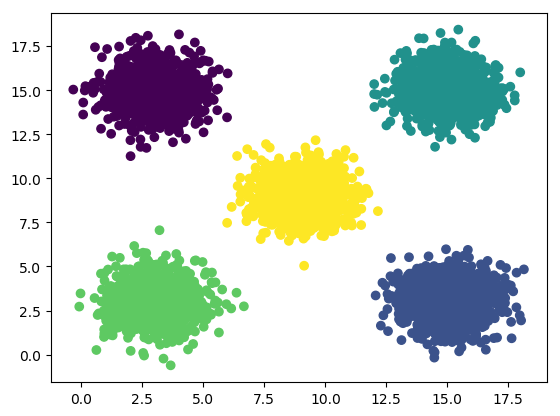

PyObject <matplotlib.collections.PathCollection object at 0x7f85bda55908>

In [14]:
# display mapped cluster number via color
scatter(X[:,1],X[:,2],c=arr)